In [1]:
'''
与原书不同，原书中一个样本xi 为列向量，本代码中一个样本xi为行向量
尝试了两种优化方法，梯度下降和牛顿法。两者结果基本相同，不过有时因初始化的原因，
会导致牛顿法中海森矩阵为奇异矩阵，np.linalg.inv(hess)会报错。以后有机会再写拟牛顿法吧。
'''

'\n与原书不同，原书中一个样本xi 为列向量，本代码中一个样本xi为行向量\n尝试了两种优化方法，梯度下降和牛顿法。两者结果基本相同，不过有时因初始化的原因，\n会导致牛顿法中海森矩阵为奇异矩阵，np.linalg.inv(hess)会报错。以后有机会再写拟牛顿法吧。\n'

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

## 导入数据

In [3]:
data_path=r'watermelon3_0_Ch.csv'
data=pd.read_csv(data_path).values

X=data[:,7:9].astype(float)

y=data[:,9]
y[y=='是']=1
y[y=='否']=0
y=y.astype(int)

print(data,X,y,y.shape)

[[1 '青绿' '蜷缩' '浊响' '清晰' '凹陷' '硬滑' 0.697 0.46 1]
 [2 '乌黑' '蜷缩' '沉闷' '清晰' '凹陷' '硬滑' 0.774 0.376 1]
 [3 '乌黑' '蜷缩' '浊响' '清晰' '凹陷' '硬滑' 0.634 0.264 1]
 [4 '青绿' '蜷缩' '沉闷' '清晰' '凹陷' '硬滑' 0.608 0.318 1]
 [5 '浅白' '蜷缩' '浊响' '清晰' '凹陷' '硬滑' 0.556 0.215 1]
 [6 '青绿' '稍蜷' '浊响' '清晰' '稍凹' '软粘' 0.403 0.237 1]
 [7 '乌黑' '稍蜷' '浊响' '稍糊' '稍凹' '软粘' 0.481 0.149 1]
 [8 '乌黑' '稍蜷' '浊响' '清晰' '稍凹' '硬滑' 0.437 0.211 1]
 [9 '乌黑' '稍蜷' '沉闷' '稍糊' '稍凹' '硬滑' 0.666 0.091 0]
 [10 '青绿' '硬挺' '清脆' '清晰' '平坦' '软粘' 0.243 0.267 0]
 [11 '浅白' '硬挺' '清脆' '模糊' '平坦' '硬滑' 0.245 0.057 0]
 [12 '浅白' '蜷缩' '浊响' '模糊' '平坦' '软粘' 0.343 0.099 0]
 [13 '青绿' '稍蜷' '浊响' '稍糊' '凹陷' '硬滑' 0.639 0.161 0]
 [14 '浅白' '稍蜷' '沉闷' '稍糊' '凹陷' '硬滑' 0.657 0.198 0]
 [15 '乌黑' '稍蜷' '浊响' '清晰' '稍凹' '软粘' 0.36 0.37 0]
 [16 '浅白' '蜷缩' '浊响' '模糊' '平坦' '硬滑' 0.593 0.042 0]
 [17 '青绿' '蜷缩' '沉闷' '稍糊' '稍凹' '硬滑' 0.719 0.103 0]] [[0.697 0.46 ]
 [0.774 0.376]
 [0.634 0.264]
 [0.608 0.318]
 [0.556 0.215]
 [0.403 0.237]
 [0.481 0.149]
 [0.437 0.211]
 [0.666 0.091]
 [0.243 0.267]
 [0.245 0.0

## 在二维图中打印西瓜分类数据集

[ True  True  True  True  True  True  True  True False False False False
 False False False False False] [False False False False False False False False  True  True  True  True
  True  True  True  True  True]
[0.697 0.774 0.634 0.608 0.556 0.403 0.481 0.437]


d:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21547 (\N{CJK UNIFIED IDEOGRAPH-542B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31958 (\N{CJK UNIFIED IDEOGRAPH-7CD6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


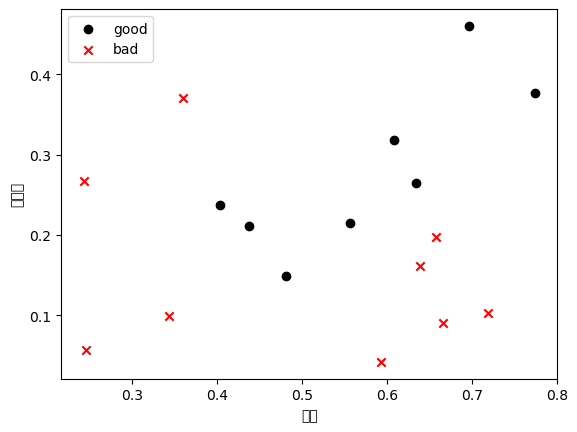

In [4]:
is_good = data[:, 9] == 1
is_bad = data[:, 9] == 0
print(is_good,is_bad)
print(data[:,7][is_good])

plt.scatter(data[:,7][is_good],data[:,8][is_good],c='k',marker='o',label='good')
plt.scatter(data[:,7][is_bad],data[:,8][is_bad],c='r',marker='x',label='bad')
plt.xlabel('密度')
plt.ylabel('含糖量')
plt.legend()
plt.show()

## 计算sigmoid函数

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

## 计算J_cost

In [6]:
def J_cost(X,y,beta):
    # 用于按列连接两个或多个数组
    X_hat=np.c_[X,np.ones((X.shape[0],1))]
    # 将其变为一个列向量,但好像多次一举嘞
    beta=beta.reshape(-1,1)
    y=y.reshape(-1,1)
    z=np.dot(X_hat,beta)

    # 计算逻辑损失（对数损失，Log Loss）
    log_loss=np.sum(-y*z+np.log(1+np.exp(z)))
    return log_loss
    

## 计算梯度

In [7]:
def gradient(X,y,beta):
    X_hat=np.c_[X,np.ones((X.shape[0],1))]
    beta=beta.reshape(-1,1)
    y=y.reshape(-1,1)
    p1=sigmoid(np.dot(X_hat,beta))

    # sum() 对整个数组的所有元素求和，返回一个标量值。
    # sum(0) 对每一列进行求和，返回一个包含每列和的数组或矩阵。
    grad=(-X_hat*(y-p1)).sum(0)
    return grad.reshape(-1,1)
    

## 梯度下降法

In [8]:
def update_param_gradDesc(X,y,beta,learning_rate,num_iteration,print_cost):
    for i in range(num_iteration):
        grad=gradient(X,y,beta)
        beta=beta-learning_rate*grad
        if(i%100==0) & print_cost:
            print("{}th iteration,cost is {}".format(i,J_cost(X,y,beta)))
    return beta

## 初始化beta

In [9]:
def initialize_beta(n):
    beta=np.random.randn(n+1,1)*0.5+1
    return beta

## 逻辑回归模型

In [10]:
def logistic_model(X,y,print_cost=False,method='gradDesc',learning_rate=1.2,num_iteration=100):
    m,n=X.shape
    # 对w1,w2,b参数进行初始化
    beta=initialize_beta(n)
    
    if method == 'gradDesc':
        return update_param_gradDesc(X,y,beta,learning_rate,num_iteration,print_cost)
    elif method == 'newton':
        return update_param_newton(X,y,beta,learning_rate,num_iteration,print_cost)
    else:
        raise ValueError("unknown solver %s" % method)

## 可视化模型结果

0th iteration,cost is 12.447985435520831
100th iteration,cost is 8.978751613299773
200th iteration,cost is 8.748835194693237
300th iteration,cost is 8.701300065430349
400th iteration,cost is 8.688874320012465
500th iteration,cost is 8.685270289298655
600th iteration,cost is 8.684169126350298
700th iteration,cost is 8.683823272362812
800th iteration,cost is 8.683712994418778
900th iteration,cost is 8.683677534626472
[[ 3.15243785]
 [12.49884325]
 [-4.42110985]]


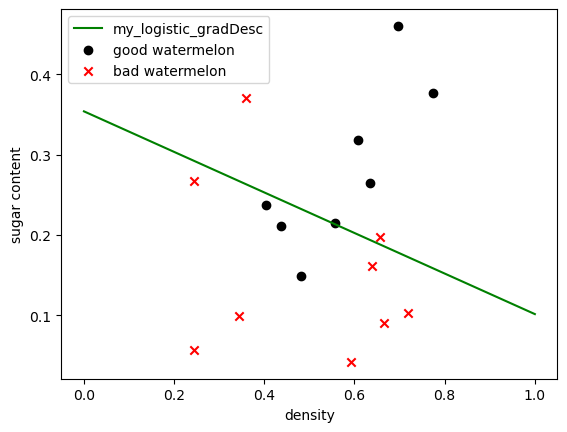

In [11]:
# 可视化模型结果
beta=logistic_model(X,y,print_cost=True,method='gradDesc',learning_rate=0.3,num_iteration=1000)
print(beta)
w1,w2,intercept=beta
x1=np.linspace(0,1)
x2=-(w1*x1+intercept)/w2

plt.xlabel('density')
plt.ylabel('sugar content')
plt.plot(x1,x2,c='green',label='my_logistic_gradDesc')
plt.scatter(X[:,0][is_good],X[:,1][is_good],c='k',marker='o',label='good watermelon')
plt.scatter(X[:,0][is_bad],X[:,1][is_bad],c='r',marker='x',label='bad watermelon')
plt.legend()

## 预测分类

In [12]:
def predict(X, beta):
    X_hat=np.c_[X,np.ones((X.shape[0],1))]
    if np.dot(X_hat,beta)>0:
        return 'good watermelon'
    else:
        return 'bad watermelon'
    

In [13]:
print(predict(np.array([[0.2,0.1]]),beta))

bad watermelon


## 用sklearn库进行逻辑回归模型的训练、可视化和预测

In [18]:
lr=linear_model.LogisticRegression(solver='lbfgs',C=1000)  # 注意sklearn的逻辑回归中，C越大表示正则化程度越低。
lr.fit(X,y)
print(lr.predict(np.array([[0.2,0.1]])))

[0]


In [20]:
lr_beta=np.c_[lr.coef_,lr.intercept_]
print(lr_beta,lr_beta.shape)
print(J_cost(X,y,lr_beta))

[[ 3.03909749 11.95570987 -4.24959139]] (1, 3)
8.687180339238743


In [16]:
w1_sk,w2_sk=lr.coef_[0,:]
y1=np.linspace(0,1)
y2=-(w1_sk*y1+lr.intercept_)/w2_sk

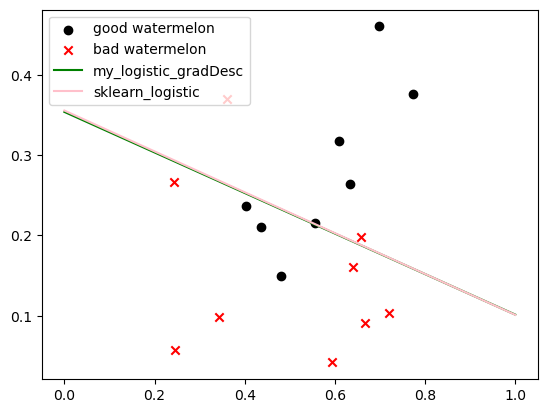

In [17]:
plt.scatter(X[:,0][is_good],X[:,1][is_good],c='k',marker='o',label='good watermelon')
plt.scatter(X[:,0][is_bad],X[:,1][is_bad],c='r',marker='x',label='bad watermelon')
plt.plot(x1,x2,c='green',label='my_logistic_gradDesc')
plt.plot(y1,y2,c='pink',label=r'sklearn_logistic')
plt.legend()
